In [2]:
import os
import zipfile
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
list_os = os.listdir('train/')
print(list_os)

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL']


In [4]:
# print each class of image in train folder
count = 0
for i in list_os:
    print(f'total {i} images :', len(os.listdir(f'train/{i}')))
    count += len(os.listdir(f'train/{i}'))
print('\ntotal images in train folder :', count)
# print total images in train folder


total ABBOTTS BABBLER images : 167
total ABBOTTS BOOBY images : 180
total ABYSSINIAN GROUND HORNBILL images : 179
total AFRICAN CROWNED CRANE images : 137
total AFRICAN EMERALD CUCKOO images : 154
total AFRICAN FIREFINCH images : 137
total AFRICAN OYSTER CATCHER images : 155
total AFRICAN PIED HORNBILL images : 187
total AFRICAN PYGMY GOOSE images : 179
total ALBATROSS images : 133
total ALBERTS TOWHEE images : 161
total ALEXANDRINE PARAKEET images : 165
total ALPINE CHOUGH images : 166
total ALTAMIRA YELLOWTHROAT images : 150
total AMERICAN AVOCET images : 179
total AMERICAN BITTERN images : 170
total AMERICAN COOT images : 158
total AMERICAN FLAMINGO images : 164
total AMERICAN GOLDFINCH images : 133
total AMERICAN KESTREL images : 155

total images in train folder : 3209


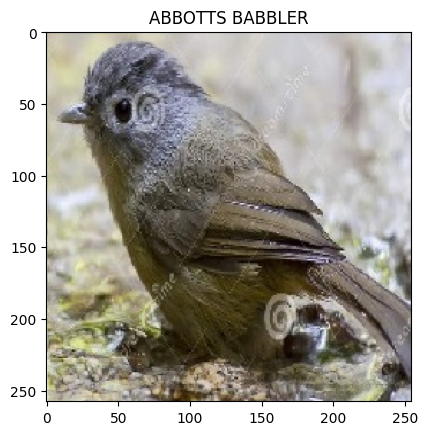

In [5]:
%matplotlib inline
img = image.load_img(f'train/{list_os[0]}/{os.listdir(f"train/{list_os[0]}")[1]}')
imgplot = plt.imshow(img)
plt.title(list_os[0])
plt.show()

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
 
train_dir = os.path.join('train/')
train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,         # Perform feature scaling across the dataset
    zoom_range=0.2,                  # Randomly zoom image
    rotation_range=20,               # Randomly rotate image
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.20
)


In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 2575 images belonging to 20 classes.
Found 634 images belonging to 20 classes.


c:\Users\aqtak\miniconda3\lib\site-packages\keras\src\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


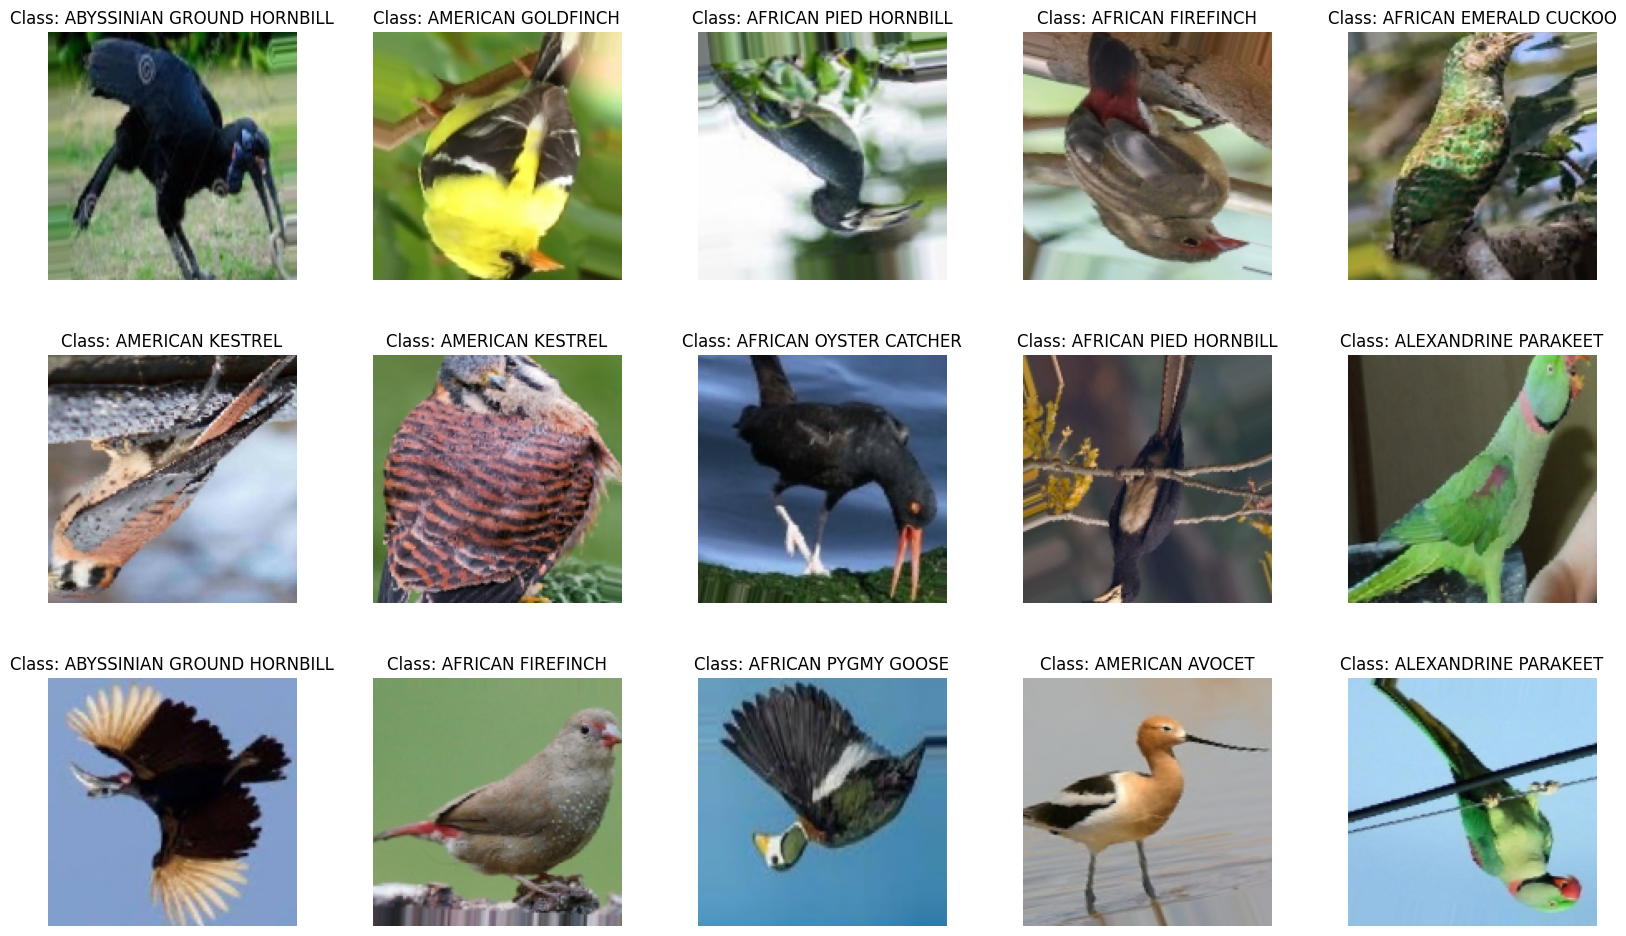

In [8]:
import numpy as np

labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [16]:
from tensorflow.keras.applications import MobileNet

# Load the pre-trained MobileNet model (excluding the top fully-connected layers)
base_model = MobileNet(include_top=False, input_shape=(150, 150, 3))

# Freeze the layers in the base model so they're not updated during training
base_model.trainable = False

# Create a new model by adding your classifier on top of the base model
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # Additional Conv2D layer
    tf.keras.layers.MaxPooling2D(2, 2),  # Additional MaxPooling2D layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(20, activation='softmax')
])

In [11]:
# from tensorflow.keras.applications import VGG16
# base_model = VGG16(include_top=False, input_shape=(150, 150, 3))

# # Freeze the layers in the base model so they're not updated during training
# base_model.trainable = False

# # Create a new model by adding your classifier on top of the base model
# model = tf.keras.models.Sequential([
#     base_model,
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(20, activation='softmax')
# ])

58889256/58889256 [==============================] - 7s 0us/step


In [8]:
# import tensorflow as tf
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),

#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),  # Increased filters
#     tf.keras.layers.MaxPooling2D(2, 2),

#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),  # Increased filters
#     tf.keras.layers.MaxPooling2D(2, 2),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dropout(0.5),  # Increased dropout rate
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),  # Increased dropout rate
#     tf.keras.layers.Dense(20, activation='softmax')
# ])

In [17]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [18]:
# Callbacks 
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.85 and logs.get('val_accuracy')>0.85):
            print("\nReached 85% accuracy so cancelling training!")
            self.model.stop_training = True

In [20]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    batch_size=64,
                    callbacks=[myCallback()],
                    verbose=1)

Epoch 1/50
81/81 [==============================] - 26s 319ms/step - loss: 2.9930 - accuracy: 0.0633 - val_loss: 2.9494 - val_accuracy: 0.1467
Epoch 2/50
81/81 [==============================] - 25s 304ms/step - loss: 2.8941 - accuracy: 0.1134 - val_loss: 2.7214 - val_accuracy: 0.2129
Epoch 3/50
81/81 [==============================] - 25s 304ms/step - loss: 2.6359 - accuracy: 0.2148 - val_loss: 2.2682 - val_accuracy: 0.3580
Epoch 4/50
81/81 [==============================] - 25s 307ms/step - loss: 2.1965 - accuracy: 0.3445 - val_loss: 1.7432 - val_accuracy: 0.4779
Epoch 5/50
81/81 [==============================] - 25s 308ms/step - loss: 1.7301 - accuracy: 0.4509 - val_loss: 1.3262 - val_accuracy: 0.5662
Epoch 6/50
81/81 [==============================] - 25s 308ms/step - loss: 1.4417 - accuracy: 0.5227 - val_loss: 1.0144 - val_accuracy: 0.6609
Epoch 7/50
81/81 [==============================] - 25s 307ms/step - loss: 1.1860 - accuracy: 0.6008 - val_loss: 0.9245 - val_accuracy: 0.6877

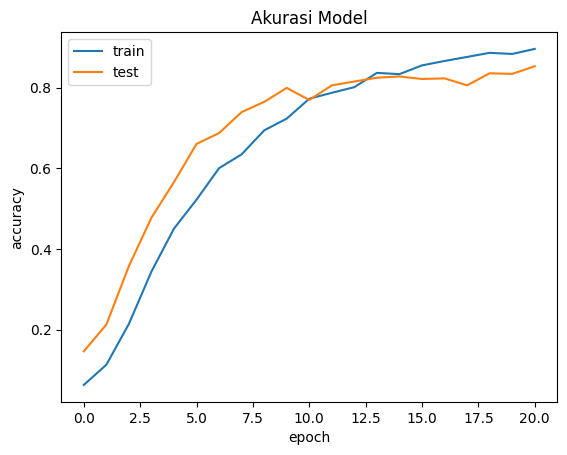

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

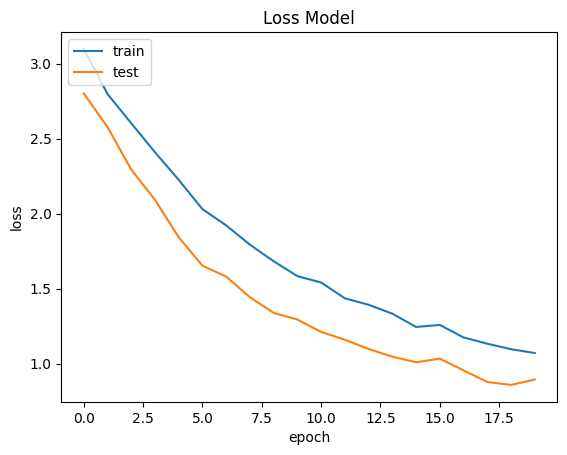

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
# save model
model.save('model_mobilenet.h5')
model.save_weights('model_weights_mobilenet.h5')

c:\Users\aqtak\miniconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
# convert model to tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model_mobilenet.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\aqtak\AppData\Local\Temp\tmp_z3eez_k\assets


INFO:tensorflow:Assets written to: C:\Users\aqtak\AppData\Local\Temp\tmp_z3eez_k\assets
